# Proyecto de aprendizaje profundo
## Modelo: Vision Transformer

Erick Isaac Lascano Otañez 				 A00836571

Mateo Zepeda Pérez	 				 A01722398

Valeria Mariane Cárdenas Rodríguez 		 A01721814

Sebastián Miramontes Soto 				 A01285296

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
# Otras librerías
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers


## Fashion MNIST dataset

El Fashion MNIST es un conjunto de datos utilizado para tareas de clasificación en aprendizaje automático, diseñado como un reemplazo más moderno y desafiante del clásico MNIST de dígitos escritos a mano.

Este dataset consta de 70,000 imágenes en escala de grises de ropa y accesorios divididas en 10 categorías, como camisetas, pantalones, zapatos y bolsos. Cada imagen tiene una resolución de 28x28 píxeles y está etiquetada con su correspondiente clase.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

**Objetivo:** Utilizar una arquitectura de *Vision Transformer* que aprenda a clasificar correctamente las imágeeenes en sus 10 categorías.

### Cargar el conjunto de datos

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train, train_labels), (test, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Una vez cargado el conjunto de datos se obtienen cuatro arreglos de NumPy:

* Los arrays `train_images` y `train_labels` conforman el *conjunto de entrenamiento*, que es utilizado por el modelo para aprender.  
* El modelo se evalúa utilizando el *conjunto de prueba*, que incluye los arrays `test_images` y `test_labels`.

Las imágenes son arreglos de NumPy de 28x28 píxeles, con valores de intensidad que van de 0 a 255. Las *etiquetas* son un arreglo de enteros que varían del 0 al 9, y cada uno corresponde a la *clase* de prenda que representa la imagen:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


Cada imagen está asociada a una única etiqueta. Como los *nombres de las clases* no están incluidos en el conjunto de datos, se deben almacenar por separado para utilizarlos al graficar las imágenes.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Inspeccionar los datos

Se examina el formato del conjunto de datos antes de entrenar el modelo. A continuación, se muestra que el **conjunto de entrenamiento** contiene 60,000 imágenes, donde cada una está representada por una matriz de 28 x 28 píxeles:

In [ ]:
train.shape

(60000, 28, 28)

Asimismo, se necesitan 60,000 etiquetas para el conjunto de entrenamiento.

In [ ]:
len(train_labels)

60000

In [ ]:
# Vector fila: vector de una dimensión con 60000 elementos.
train_labels.shape

(60000,)

Cada etiqueta es un entero entre 0 y 9

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Ahora para el caso de la 10,000 imágenes del set de prueba.

In [ ]:
test.shape

(10000, 28, 28)

Por supuesto, deben haber 10,000 etiquetas para el set de prueba.

In [ ]:
len(test_labels)

10000

## Preprocesamiento de los datos

Se redimensionan las imágenes a una forma de 4 dimensiones (`(batch_size, 28, 28, 1)`) para que el Vision Transformer pueda procesarlas en sus distintas capas.

In [ ]:
train = np.array(train).reshape((-1, 28, 28, 1))
test = np.array(test).reshape((-1, 28, 28, 1))

In [ ]:
train.shape

(60000, 28, 28, 1)

In [ ]:
test.shape

(10000, 28, 28, 1)

### Visualizar el conjunto de entrenamiento (escala de grises)

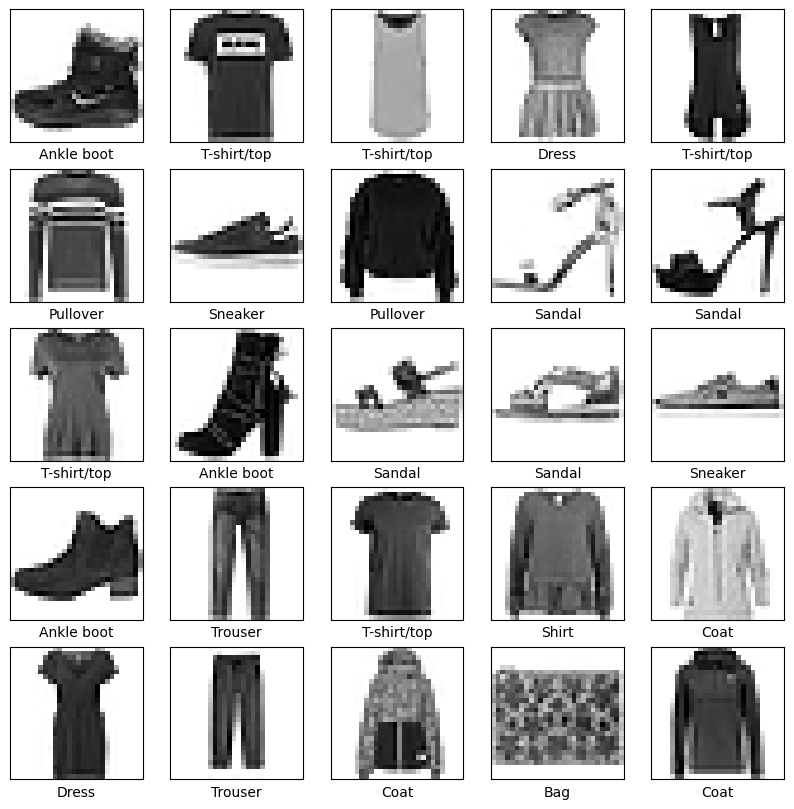

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Modelo

**¿Qué es un Vision Transformer?**

El Vision Transformer (ViT) es una arquitectura revolucionaria de redes neuronales que replantea cómo procesamos y entendemos las imágenes. El modelo Vision Transformer (ViT) fue introducido en 2021 en un artículo de investigación titulado *“An Image is Worth 16*16 Words: Transformers for Image Recognition at Scale”*, publicado en la conferencia ICLR 2021. Inspirado en el éxito de los Transformers en el procesamiento de lenguaje natural, ViT propone una nueva forma de analizar imágenes dividiéndolas en pequeños fragmentos (*patches*) y aprovechando los mecanismos de autoatención.

![Arquitectura de un ViT](https://production-media.paperswithcode.com/methods/Screen_Shot_2021-01-26_at_9.43.31_PM_uI4jjMq.png)

Esto permite al modelo capturar relaciones tanto locales como globales dentro de las imágenes, logrando un rendimiento impresionante en diversas tareas de visión por computadora.


**Referencias:**

- https://medium.com/@hansahettiarachchi/unveiling-vision-transformers-revolutionizing-computer-vision-beyond-convolution-c410110ef061

- https://www.kaggle.com/code/lonnieqin/fashion-mnist-classification-vision-transformer/notebook

- https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb

- https://towardsdatascience.com/are-transformers-better-than-cnns-at-image-recognition-ced60ccc7c8

- https://keras.io/api/layers/attention_layers/multi_head_attention/


### Configuración de Arquitectura

Se definen los hiperparámetros y la configuración de la arquitectura del modelo Vision Transformer.

In [ ]:
class Config:
    # Tamaño original de la imagen
    input_size = 28
    # Forma de entrada de la imagen
    input_shape = [input_size, input_size, 1]
    # Tasa de aprendizaje del modelo
    learning_rate = 0.001
    # Tasa de decaimiento de pesos del modelo
    weight_decay = 0.0001
    # Tamaño del lote del modelo
    batch_size = 256
    # Número de clases
    num_classes = 10
    # Número de épocas
    num_epochs = 50
    # Tamaño al que se redimensiona la imagen
    image_size = 72
    # Tamaño del patch
    patch_size = 6
    # Número total de patches
    num_patches = (image_size // patch_size) ** 2 #144
    # Dimensión de la proyección
    projection_dim = 64
    # Número de heads en la atención
    num_heads = 4
    # Unidades en el transformador
    transformer_units = [
        projection_dim * 2,  # Primer capa del MLP del transformador
        projection_dim       # Segunda capa del MLP del transformador
    ]
    # Número de capas del transformador
    transformer_layers = 8
    # Unidades en el MLP head
    mlp_head_units = [2048, 1024, 512]


Se crea una capa de aumento de datos que normaliza, redimensiona y aplica transformaciones aleatorias a las imágenes para mejorar la generalización del modelo.

In [ ]:
augmentation_layer = tf.keras.Sequential([
    # Capa de entrada que define la forma de la imagen de entrada
    tf.keras.layers.Input(Config.input_shape),

    # Capa de normalización para centrar y escalar los valores de píxel
    tf.keras.layers.Normalization(),

    # Capa de redimensionamiento de la imagen a un tamaño específico
    tf.keras.layers.Resizing(Config.image_size, Config.image_size),

    # Capa para rotar aleatoriamente la imagen con un factor de rotación pequeño
    tf.keras.layers.RandomRotation(factor=0.02),

    # Capa para hacer zoom aleatorio en la imagen, ajustando las dimensiones de altura y ancho
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
])


Se define una función que implementa un perceptrón multicapa (MLP) aplicando capas densas con activación GELU y regularización mediante Dropout para controlar el sobreajuste.

En el modelo de Vision Transformer, el MLP se utiliza como parte del bloque Transformer para procesar las representaciones intermedias después de aplicar el "self-attention". Esto permite modelar relaciones no lineales y transformar las características aprendidas, contribuyendo a la capacidad del modelo para capturar patrones complejos en las imágenes.

La regularización con Dropout reduce el riesgo de sobreajuste, mejorando la generalización en tareas de visión por computadora.

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    # Iterar sobre las unidades ocultas y aplicar capas Dense y Dropout
    for units in hidden_units:
        x = layers.Dense(units, activation='gelu')(x)
        x = layers.Dropout(dropout_rate)(x)  # Aplicar dropout
    return x

## Capas de creación de patches

Se define una capa que convierte una imagen en una cuadrícula de patches de tamaño `patch_size x patch_size`.

En esta capa del Vision Transfomer, la imagen se divide en bloques más pequeños, facilitando su procesamiento posterior en el modelo, para así capturar tanto relaciones locales como globales dentro de la imagen.

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        # Obtener el tamaño del batch y las dimensiones de la imagen
        batch_size = tf.shape(images)[0]
        height = tf.shape(images)[1]
        width = tf.shape(images)[2]

        # Extraer patches de la imagen
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )

        # Obtener la dimensión de los patches (tamaño del patch * número de canales)
        patch_dims = patches.shape[-1]

        # Reformatear para que cada patch tenga la forma [batch_size, num_patches, patch_dim]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])

        return patches

Se define una función para mostrar el conjunto de imágenes en una cuadrícula de subgráficas (patches).

In [ ]:
def sample_images(images, row_count, column_count):
    fig, axs = plt.subplots(row_count, column_count, figsize=(10,10))
    for i in range(row_count):
        for j in range(column_count):
            axs[i,j].imshow(images[i * column_count + j])
            axs[i,j].axis('off')
    plt.show()

(256, 72, 72, 1)
Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 36


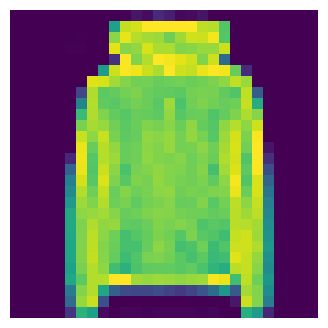

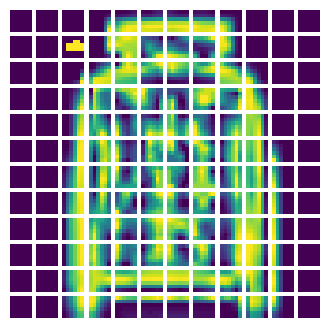

In [ ]:
plt.figure(figsize=(4, 4))
start_index = np.random.choice(train.shape[0] // 2)
image = train[start_index: start_index + Config.batch_size]
plt.imshow(np.squeeze(image[0]).astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor(image), size=(Config.image_size, Config.image_size)
)
print(resized_image.shape)
patches = Patches(Config.patch_size)(resized_image)
print(f"Image size: {Config.image_size} X {Config.image_size}")
print(f"Patch size: {Config.patch_size} X {Config.patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (Config.patch_size, Config.patch_size))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

### Capa de Codificador de Patches

Una vez que se han dividido las imágenes en patches, estos se transforman en vectores mediante una proyección lineal, creando una secuencia de embeddings que sirven como tokens de entrada para las capas posteriores, permitiendo que el modelo capture relaciones locales y globales eficientemente, y añadiendo embeddings de posición para mantener la información espacial de los parches.

In [ ]:
class PatchEncoder(layers.Layer):

    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        # Generar las posiciones para cada parche
        positions = tf.range(start=0, limit=self.num_patches, delta=1)

        # Aplicar la proyección a los parches
        projected_patches = self.projection(patch)

        # Agregar los embeddings de las posiciones a los parches proyectados
        encoded = projected_patches + self.position_embedding(positions)

        return encoded

### Crear el modelo

Ahora, se define la arquitectura de un modelo Vision Transformer (ViT) siguiendo una secuencia de pasos que transforman las imágenes de entrada en representaciones que pueden ser procesadas por un transformador para tareas de clasificación de imágenes.

1. **Inputs**: La entrada del modelo es una imagen con la forma definida por `Config.input_shape`.

2. **Data Augmentation**: Se aplica una capa de aumento de datos (`augmentation_layer`) para mejorar la generalización del modelo mediante técnicas como la normalización, redimensionado, rotación aleatoria y zoom aleatorio.

3. **Patches**: Las imágenes aumentadas se dividen en parches más pequeños utilizando la capa `Patches`, que extrae sub-regiones de la imagen y las convierte en "tokens".

4. **Patch Encoder**: Los patches extraídos se proyectan a un espacio de mayor dimensión con la capa `PatchEncoder`. Esto se hace para convertir cada parche en un vector, añadiendo también embeddings de posición para preservar la información espacial de los parches dentro de la imagen.

5. **Transformer Layers**: Se aplican múltiples capas de transformador (`Transformer Layers`), donde cada capa incluye:
    - **Layer Normalization 1**: Normaliza la entrada antes de la atención multi-cabeza.
    - **Multi-Head Attention**: El mecanismo de atención multi-head permite al modelo enfocarse en diferentes partes de la imagen simultáneamente, mejorando la capacidad de captura de relaciones espaciales.
    - **Skip Connection 1**: Se agrega una conexión residual para mantener la información pasada.
    - **Layer Normalization 2**: Normaliza la salida después de la atención.
    - **MLP (Feedforward Neural Network)**: Una red neuronal "fully connected" aplicada a la salida de la atención para aprender representaciones no lineales.
    - **Skip Connection 2**: Otra conexión residual se aplica para estabilizar el entrenamiento.

6. **Layer Normalization Final**: Normaliza la representación final después de las capas del transformador.

7. **Flatten y Dropout**: Se aplana la salida de las representaciones para conectarlas con las capas de clasificación, aplicando Dropout para prevenir el sobreajuste.

8. **Head MLP**: Una red neuronal de múltiples capas (MLP) que procesa la representación final antes de la capa de salida.

9. **Output Layer**: Una capa densa final que produce la salida del modelo, que corresponde a las probabilidades de pertenecer a cada una de las `Config.num_classes` clases.


In [ ]:
# Función para crear el modelo Vision Transformer (ViT)
def create_vision_transformer():
    # Inputs
    inputs = layers.Input(shape=Config.input_shape)

    # Data Augmentation
    augmented = augmentation_layer(inputs)

    # Patches
    patches = Patches(Config.patch_size)(augmented)

    # Patch Encoder
    encoder_patches = PatchEncoder(Config.num_patches, Config.projection_dim)(patches)

    # Transformer Layers
    for _ in range(Config.transformer_layers):
        # Layer Normalization 1 (Aplicada antes de la atención)
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoder_patches)

        # Multi-Head Attention
        attention_output = layers.MultiHeadAttention(
            num_heads=Config.num_heads,
            key_dim=Config.projection_dim,
            dropout=0.1
        )(x1, x1)

        # Skip Connection 1 (conexión residual)
        x2 = attention_output + encoder_patches

        # Layer Normalization 2 (Aplicada después de la atención)
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP (Feedforward Neural Network)
        x3 = mlp(x3, hidden_units=Config.transformer_units, dropout_rate=0.1)

        # Skip Connection 2
        encoder_patches = x3 + x2

    # Capa de Normalización final
    representation = layers.LayerNormalization(epsilon=1e-6)(encoder_patches)

    # Aplanar y Dropout antes de la capa de salida
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # Head MLP
    features = mlp(representation, hidden_units=Config.mlp_head_units, dropout_rate=0.5)

    # Capa de salida (capa densa con el número de clases)
    outputs = layers.Dense(Config.num_classes)(features)

    # Crear el modelo
    model = keras.Model(inputs=inputs, outputs=outputs)


    return model


### Compilar el modelo

In [ ]:
# Crear el modelo Vision Transformer
vit_classifier = create_vision_transformer()

# Mostrar el resumen del modelo (parámetros)
vit_classifier.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 72, 72, 1)      │              3 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_1 (Patches)       │ (None, None, 36)       │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder             │ (None, 144, 64)        │         11,584 │ patches_1[0][0]        │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 144, 64)        │            128 │ patch_encoder[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 144, 64)        │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 144, 64)        │              0 │ multi_head_attention[… │
│                           │                        │                │ patch_encoder[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 144, 64)        │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 144, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 144, 128)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 144, 64)        │          8,256 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 144, 64)        │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 144, 64)        │              0 │ dropout_2[0][0],       │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 144, 64)        │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 144, 64)        │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├──────────────────────

 Total params: 22,181,837 (84.62 MB)

 Trainable params: 22,181,834 (84.62 MB)

 Non-trainable params: 3 (16.00 B)

### Descripción de la arquitectura

1. **Entrada**: El modelo recibe una imagen de tamaño 28x28 con un solo canal (blanco y negro). La imagen se pasa a través de una capa de aumento de datos para mejorar la variabilidad en los datos de entrada.

2. **División en Patches**: La imagen aumentada se divide en parches de tamaño 6x6, lo que resulta en un total de 144 parches.

3. **Codificación de Parches (Patch Encoder)**: Los parches se proyectan a un espacio de mayor dimensión (64 unidades) utilizando un codificador específico.

4. **Bloques de Transformadores**: Se aplican 8 capas de transformadores. Cada capa consta de los siguientes componentes:
   - **Normalización de Capa 1**: Normalización antes de la atención para mejorar la estabilidad.
   - **Multi-Head Attention**: Multi-Head Attention (con 4 cabezas y una dimensión de encoder de 64) captura las relaciones entre los patches.
   - **Conexión Residual 1**: La salida de la atención se suma a la entrada original para estabilizar el aprendizaje.
   - **Normalización de Capa 2**: Se aplica después de la atención.
   - **Red Neuronal Feedforward (MLP)**: Una red neuronal que transforma las representaciones a través de dos capas densas con función de activación (GELU) y un *dropout* para evitar sobreajuste.
   - **Conexión Residual 2**: La salida de la red feedforward se suma a la entrada del bloque.

5. **Normalización Final**: Después de las 8 capas de transformador, se aplica una capa de normalización para consolidar la información.

6. **Aplanado y Dropout**: La salida de la última capa de normalización se aplana y se pasa a través de una capa de *dropout* (tasa de 0.5) para regularización.

7. **MLP Final (Head)**: Una red neuronal feedforward adicional procesa las características obtenidas, con tres capas densas (2048, 1024 y 512 unidades) con función de activación 'GELU' (Gaussian Error Linear Unit) para una activación suave para introducir la no linealidad al modelo, seguidas de un *dropout*.

8. **Capa de Salida**: La capa final es una capa densa con unidades igual al número de clases (10 en este caso) que produce la salida para clasificación.

### Parámetros de Configuración:
- **Entrada**: Tamaño de la imagen de entrada 28x28, con una imagen aumentada de tamaño 72x72.
- **Parches**: Cada patch tiene un tamaño de 6x6, con 144 parches en total.
- **Codificación de Parches**: Los parches se proyectan a un espacio de dimensión 64.
- **Transformador**: 8 capas de transformador con atención multi-cabeza y redes neuronales feedforward.
- **Tasa de Aprendizaje**: 0.001 y decaimiento de peso de 0.0001.
- **Tamaño de Lote**: 256 y número de épocas de 50.
- **Número de Clases**: 10 clases en la salida.


### Entrenamiento

Para este modelo, se utiliza el optimizador Adam, que es altamente eficiente para problemas de optimización en redes neuronales. Adam adapta automáticamente las tasas de aprendizaje para cada parámetro, combinando las ventajas de los algoritmos Adagrad y RMSProp, lo que mejora la convergencia.

La tasa de aprendizaje está configurada con el valor `0.001`, lo que determina la rapidez con la que el modelo ajusta sus parámetros durante el entrenamiento. Además, se utiliza una tasa de decaimiento de pesos de `0.0001`, lo que ayuda a prevenir el sobreajuste al penalizar los valores elevados de los pesos.

La función de costo empleada es `SparseCategoricalCrossentropy(from_logits=True)`, que es adecuada para problemas de clasificación multiclase con etiquetas enteras y logits en la salida, los cuales en las siguientes líneas de código serán convertidas en probabilidades.

La métrica utilizada para evaluar el rendimiento del modelo es la *exactitud* (`accuracy`), que mide la proporción de predicciones correctas para todas las clases en cada iteración del entrenamiento.

In [ ]:
# Se define el optimizador
optimizer = tf.keras.optimizers.Adam(
    learning_rate=Config.learning_rate,
    weight_decay=Config.weight_decay
)
# Se compila el modelo
vit_classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=["accuracy"]
)


In [ ]:
import time

In [ ]:
start_time = time.time()

# Entrenar el modelo
history = vit_classifier.fit(
    train,
    train_labels,
    epochs=Config.num_epochs,
    batch_size=Config.batch_size,
    validation_data=(test, test_labels)
)
end_time = time.time()

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 375ms/step - accuracy: 0.5473 - loss: 1.5298 - val_accuracy: 0.7947 - val_loss: 0.5172
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 372ms/step - accuracy: 0.7612 - loss: 0.6366 - val_accuracy: 0.8067 - val_loss: 0.5014
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 374ms/step - accuracy: 0.7878 - loss: 0.5701 - val_accuracy: 0.8372 - val_loss: 0.4420
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 375ms/step - accuracy: 0.7962 - loss: 0.5491 - val_accuracy: 0.8426 - val_loss: 0.4187
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 91s 385ms/step - accuracy: 0.8074 - loss: 0.5175 - val_accuracy: 0.8508 - val_loss: 0.4052
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 382ms/step - accuracy: 0.8163 - loss: 0.4958 - val_accuracy: 0.8506 - val_loss: 0.4005
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 380ms/step - accuracy: 0.8216 - loss: 0.4796 - val_accuracy: 0.8535 - val_loss: 0.3883
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 379ms/step - accuracy: 0.8257 - 

### Evaluar entrenamiento

In [ ]:
# Mostrar el tiempo de entrenamiento
elapsed_time = end_time - start_time
print(f"Tiempo de entrenamiento: {elapsed_time:.2f} segundos")


Tiempo de entrenamiento: 6551.27 segundos


El tiempo de entrenamiento de 6551.27 segundos (aproximadamente 1 hora y 49 minutos) es relativamente extenso dado que el modelo de Vision Transformer (ViT) es complejo, además que se da un proceso de optimización intensivo. Asimismo el tiempo puede variar según el tamaño de los datos y los recursos disponibles.

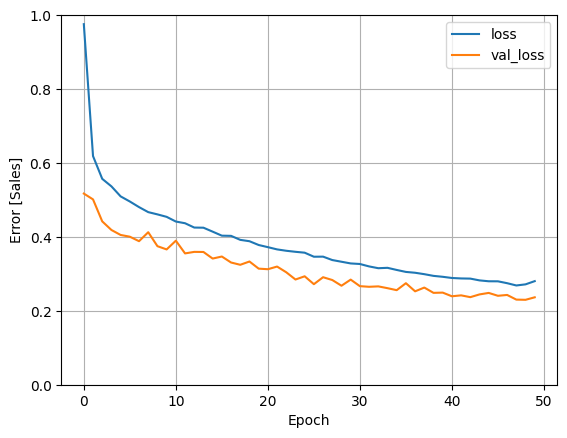

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Sales]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Se puede decir que se ha dado un robusto y correcto aprendizaje dado que, en todas las épocas, la pérdida en validación es menor que la de entrenamiento, lo que indica que el modelo está generalizando correctamente y no está sobreajustándose a los datos de entrenamiento.

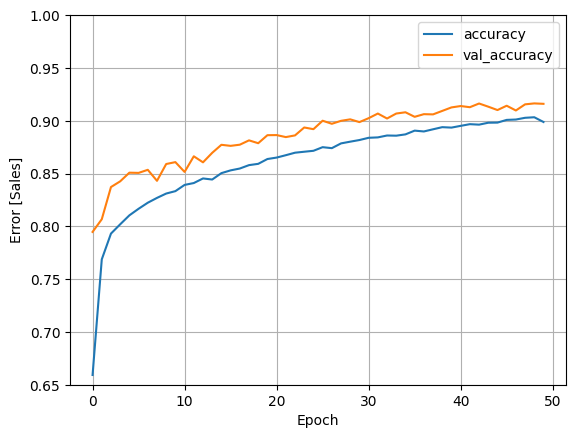

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0.65, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Sales]')
  plt.legend()
  plt.grid(True)

plot_accuracy(history)

Así también, para el la métrica de evaluación, en todas las épocas el 'accuracy' en validación es mayor que la de entrenamiento, se puede concluir que el modelo es capaz de generalizar y aprender correctamente las características de las imágenes del dataset, sin mostrar sobreajuste, lo que también valida que tan correcto es el modelo.

### Evaluar 'accuracy'

In [ ]:
test_loss, test_acc = vit_classifier.evaluate(test,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - 16ms/step - accuracy: 0.9160 - loss: 0.2365

Test accuracy: 0.9160000085830688


El valor de **Test accuracy: 0.916** indica que el modelo ha logrado una precisión del 91.6% en el conjunto de datos de prueba del Fashion MNIST. Esto significa que, de todas las predicciones realizadas por el modelo en los datos de prueba, aproximadamente el 91.6% fueron correctas. Este es un buen indicador de que el modelo tiene una capacidad sólida para generalizar a datos no vistos.


### Hacer predicciones

Dado que la capa de salida de este modelo es de tipo logit, es decir, produce valores no normalizados, se agrega una capa de tipo Softmax para convertir esos valores en probabilidades. Puesto que la función Softmax asegura que las salidas estén entre 0 y 1, y la suma de todas las probabilidades sea igual a 1.

In [ ]:
probability_model = tf.keras.Sequential([vit_classifier,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


## Verificar predicciones

Dada la función de activación Softmax, ahora se obtiene un array de 10 valores, donde el número más alto representa la clase con la mayor probabilidad de haber sido predicha por el modelo.

In [ ]:
predictions[0]

array([1.2027802e-29, 1.8313939e-27, 3.7280862e-30, 7.4869190e-29,
       1.2794685e-30, 1.6522410e-11, 1.9696747e-29, 1.2860423e-08,
       3.0390194e-21, 1.0000000e+00], dtype=float32)

En este caso, para la primera imagen del set de validación, el modelo predice que la imagen pertenece a la clase "ankle boot"

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

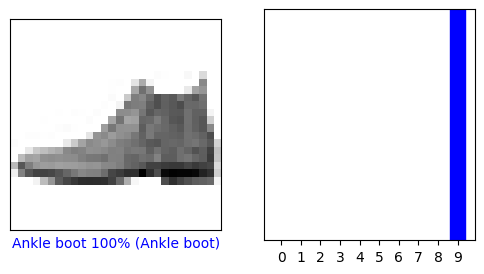

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

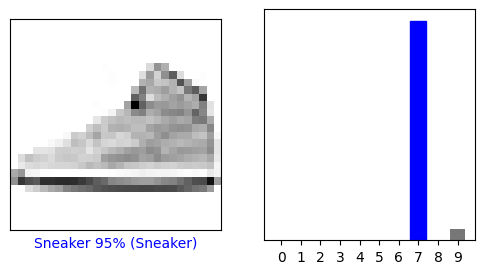

In [ ]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

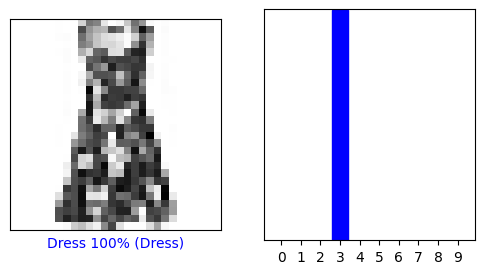

In [ ]:
i = 5099
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

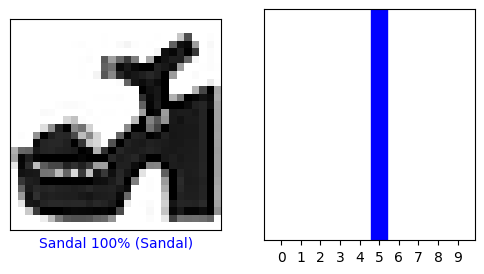

In [ ]:
i = 7006
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

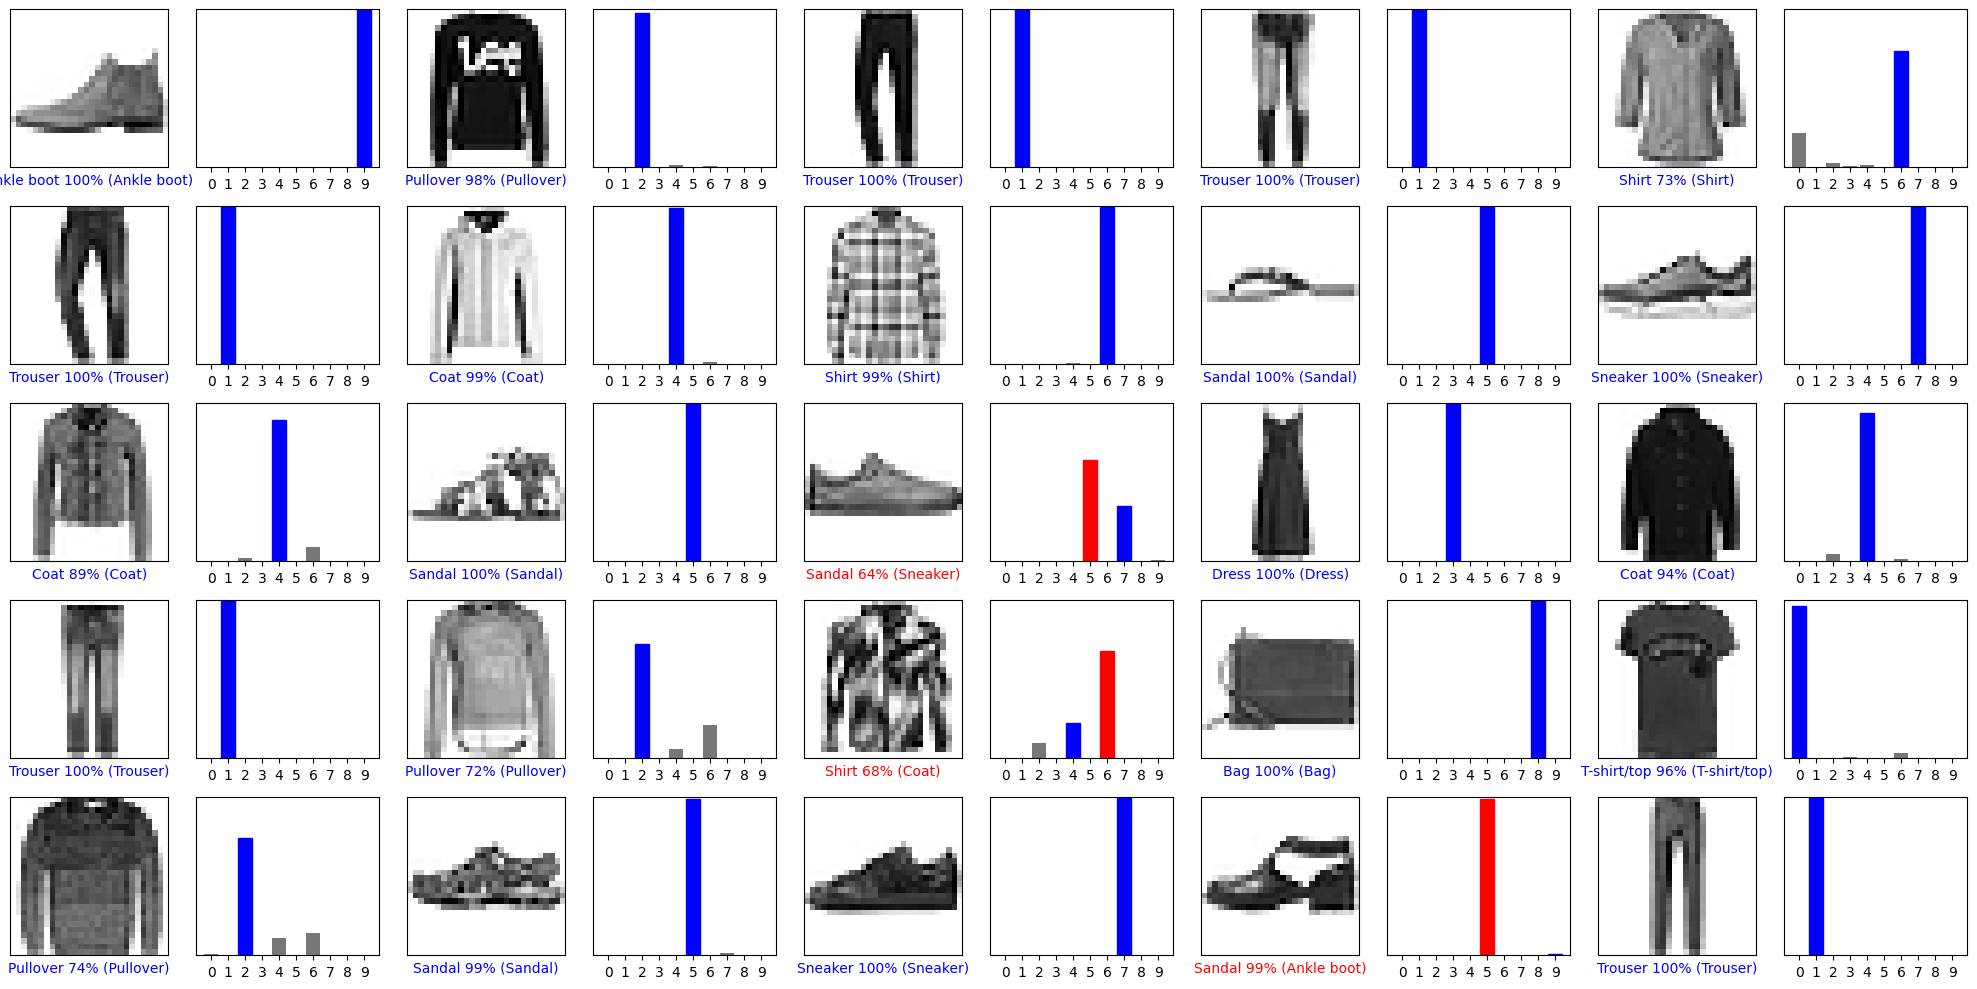

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Análisis de clasificación general

In [ ]:
from sklearn.metrics import classification_report
predictions_label = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predictions_label, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.84      0.86      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.89      0.84      0.87      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.82      0.90      0.86      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.75      0.76      0.75      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Por último, el reporte de clasificación muestra que el modelo tiene un buen rendimiento en las distintas categorías del conjunto de datos Fashion MNIST. La **precisión** y el **recall** en general son altos, lo que indica que el modelo es eficiente en la clasificación y es capaz de identificar correctamente las clases en la mayoría de los casos. Específicamente, las categorías como **Trouser**, **Sandal**, **Bag** y **Sneaker** tienen un rendimiento excelente, con precisión y recall cercanos a 1.00, lo que sugiere que el modelo es muy preciso al identificar estos artículos de ropa.

Sin embargo, hay algunas categorías con un rendimiento ligeramente más bajo, como **Shirt** y **Coat**, donde la precisión y el recall son más bajos (alrededor de 0.75-0.82), lo que podría indicar que el modelo tiene más dificultades para diferenciar estos artículos en comparación con otras clases. A pesar de esto, el **F1-score** se mantiene bastante alto en todas las clases, lo que sugiere un buen equilibrio entre precisión y recall.

En términos generales, el modelo tiene un **accuracy global del 92%**, lo que es bastante bueno, y las métricas **macro avg** y **weighted avg** también muestran valores similares, reflejando que el modelo de Vision Transformer (ViT) demuestra ser una alternativa competitiva frente a modelos de redes neuronales profundas (DNN) o redes neuronales convolucionales (CNN), ya que ofreció un rendimiento pertinente y generalizado para la presente tarea de clasificación, con valores altos en las métricas de evaluación, sin presentar sobreajuste en su entrenamiento.

Sin embargo, a pesar de su efectividad, el tiempo de entrenamiento fue relativamente alto, incluso al utilizar la T4 GPU, lo que podría ser un desafío en aplicaciones que requieren tiempos de entrenamiento rápidos o recursos limitados.